# Pipeline de Big Data: Análise de Produção Cinematográfica

## Projeto Final - Fundamentos de Big Data

**Equipe:** Victor Melo, Eduarda Souza, Arthur Padilha

**Objetivo:** Desenvolver uma solução completa de análise de dados sobre a indústria cinematográfica, identificando padrões de produção, receita e popularidade de filmes.

**Problema Real:** Compreender quais fatores influenciam o sucesso comercial e crítico dos filmes, auxiliando produtoras e investidores em decisões estratégicas.


## 1. Fontes de Dados (Data Sources)

### Descrição das Fontes

Utilizaremos dois datasets principais em formato CSV:

1. **movies_metadata.csv**: Contém metadados detalhados sobre filmes
   - Colunas: título, orçamento, receita, gêneros, idioma, data de lançamento, popularidade, avaliação, etc.
   - Tipo: Dados estruturados
   - Origem: The Movie Database (TMDb)

2. **credits.csv**: Informações sobre elenco e equipe de produção
   - Colunas: cast (elenco), crew (equipe técnica), id do filme
   - Tipo: Dados semi-estruturados (JSON dentro de CSV)
   - Origem: The Movie Database (TMDb)

### Justificativa

Esses dados são relevantes para análises de mercado cinematográfico, permitindo identificar tendências, padrões de investimento e fatores de sucesso na indústria.


## 2. Ingestão (Ingestion)

Nesta etapa, carregamos os dados brutos das fontes CSV para dataframes do Pandas, realizando uma análise inicial da estrutura dos dados.


In [ ]:
import pandas as pd
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("📦 Bibliotecas importadas com sucesso!")


📦 Bibliotecas importadas com sucesso!


In [ ]:
print("Iniciando ingestão dos dados...")

movies_raw = pd.read_csv('../bronze/movies_metadata.csv', low_memory=False)
print(f"movies_metadata.csv carregado: {movies_raw.shape[0]} linhas x {movies_raw.shape[1]} colunas")

credits_raw = pd.read_csv('../bronze/credits.csv')
print(f"credits.csv carregado: {credits_raw.shape[0]} linhas x {credits_raw.shape[1]} colunas")

print("\nAmostra dos dados de filmes:")
display(movies_raw.head(3))


🔄 Iniciando ingestão dos dados...
✅ movies_metadata.csv carregado: 45466 linhas x 24 colunas
✅ credits.csv carregado: 45476 linhas x 3 colunas

📊 Amostra dos dados de filmes:


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [ ]:
print("Informações sobre os dados de filmes:")
print(movies_raw.info())

print("\nInformações sobre os dados de créditos:")
print(credits_raw.info())

print("\nVerificando valores nulos em movies_metadata:")
print(movies_raw.isnull().sum())


📋 Informações sobre os dados de filmes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date  

## 3. Transformação (Transformation)

Etapa crítica onde os dados brutos são limpos, normalizados, enriquecidos e preparados para análise. Aplicaremos várias técnicas de transformação de dados.


### 3.1 Limpeza de Dados


In [ ]:
movies = movies_raw.copy()
credits = credits_raw.copy()

print("Iniciando limpeza de dados...")

threshold = len(movies) * 0.5
movies = movies.dropna(thresh=threshold, axis=1)
print(f"Colunas com >50% nulos removidas")

numeric_columns = ['budget', 'revenue', 'runtime']
for col in numeric_columns:
    if col in movies.columns:
        movies[col] = pd.to_numeric(movies[col], errors='coerce').fillna(0)

print(f"Valores numéricos nulos preenchidos com 0")

movies = movies.dropna(subset=['id', 'title'])
print(f"Filmes sem título ou ID removidos")

movies['id'] = movies['id'].astype(str)
credits['id'] = credits['id'].astype(str)

print(f"\nDados após limpeza: {movies.shape[0]} linhas x {movies.shape[1]} colunas")
print(f"Dados de créditos: {credits.shape[0]} linhas x {credits.shape[1]} colunas")


🧹 Iniciando limpeza de dados...
✅ Colunas com >50% nulos removidas
✅ Valores numéricos nulos preenchidos com 0
✅ Filmes sem título ou ID removidos

📊 Dados após limpeza: 45460 linhas x 21 colunas
📊 Dados de créditos: 45476 linhas x 3 colunas


### 3.2 Normalização e Enriquecimento


In [ ]:
print("Realizando normalização e enriquecimento...")

if 'release_date' in movies.columns:
    movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
    movies['ano_lancamento'] = movies['release_date'].dt.year
    movies['mes_lancamento'] = movies['release_date'].dt.month
    print("Data de lançamento convertida e ano/mês extraídos")

movies['roi'] = np.where(
    movies['budget'] > 0,
    ((movies['revenue'] - movies['budget']) / movies['budget']) * 100,
    0
)
print("ROI calculado")

movies['lucro'] = movies['revenue'] - movies['budget']
print("Lucro calculado")

def categorizar_orcamento(budget):
    if budget == 0:
        return 'Sem informação'
    elif budget < 1000000:
        return 'Baixo (<1M)'
    elif budget < 50000000:
        return 'Médio (1M-50M)'
    elif budget < 100000000:
        return 'Alto (50M-100M)'
    else:
        return 'Muito Alto (>100M)'

movies['categoria_orcamento'] = movies['budget'].apply(categorizar_orcamento)
print("Categorias de orçamento criadas")

def extrair_primeiro_genero(genres_str):
    try:
        genres = json.loads(str(genres_str).replace("'", '"'))
        if genres and len(genres) > 0:
            return genres[0]['name']
    except:
        pass
    return 'Desconhecido'

if 'genres' in movies.columns:
    movies['genero_principal'] = movies['genres'].apply(extrair_primeiro_genero)
    print("Gênero principal extraído")

print(f"\nNovas colunas criadas: {list(movies.columns[-6:])}")


🔄 Realizando normalização e enriquecimento...
✅ Data de lançamento convertida e ano/mês extraídos
✅ ROI calculado
✅ Lucro calculado
✅ Categorias de orçamento criadas
✅ Gênero principal extraído

📊 Novas colunas criadas: ['ano_lancamento', 'mes_lancamento', 'roi', 'lucro', 'categoria_orcamento', 'genero_principal']


### 3.3 Integracao de Dados


In [ ]:
print("Integrando dados de filmes e créditos...")

def extrair_atores_principais(cast_str, n=3):
    try:
        cast = json.loads(str(cast_str).replace("'", '"'))
        atores = [actor['name'] for actor in cast[:n]]
        return ', '.join(atores) if atores else 'Desconhecido'
    except:
        return 'Desconhecido'

def extrair_diretor(crew_str):
    try:
        crew = json.loads(str(crew_str).replace("'", '"'))
        for person in crew:
            if person.get('job') == 'Director':
                return person['name']
    except:
        pass
    return 'Desconhecido'

credits['atores_principais'] = credits['cast'].apply(extrair_atores_principais)
credits['diretor'] = credits['crew'].apply(extrair_diretor)
print("Atores principais e diretor extraídos")

dados_integrados = movies.merge(
    credits[['id', 'atores_principais', 'diretor']], 
    on='id', 
    how='left'
)

print(f"Dados integrados: {dados_integrados.shape[0]} linhas x {dados_integrados.shape[1]} colunas")
print(f"\nAmostra dos dados integrados:")
display(dados_integrados[['title', 'budget', 'revenue', 'roi', 'genero_principal', 'diretor', 'atores_principais']].head())


🔗 Integrando dados de filmes e créditos...
✅ Atores principais e diretor extraídos
✅ Dados integrados: 45536 linhas x 29 colunas

📋 Amostra dos dados integrados:


,title,budget,revenue,roi,genero_principal,diretor,atores_principais
0,Toy Story,30000000.0,373554033.0,1145.180110,Animation,Desconhecido,Desconhecido
1,Jumanji,65000000.0,262797249.0,304.303460,Adventure,Desconhecido,Desconhecido
2,Grumpier Old Men,0.0,0.0,0.000000,Romance,Desconhecido,"Walter Matthau, Jack Lemmon, Ann-Margret"
3,Waiting to Exhale,16000000.0,81452156.0,409.075975,Comedy,Desconhecido,Desconhecido
4,Father of the Bride Part II,0.0,76578911.0,0.000000,Comedy,Desconhecido,"Steve Martin, Diane Keaton, Martin Short"


## 4. Carregamento (Loading)

Nesta etapa, salvamos os dados transformados em formato estruturado para uso posterior e análise. Utilizaremos tanto CSV quanto Parquet para demonstrar diferentes formatos de armazenamento.


In [ ]:
import os

print("Iniciando carregamento dos dados transformados...")

os.makedirs('../dados/bronze', exist_ok=True)  
os.makedirs('../dados/silver', exist_ok=True)  
os.makedirs('../dados/gold', exist_ok=True)    

movies_raw.to_csv('../dados/bronze/movies_raw.csv', index=False)
credits_raw.to_csv('../dados/bronze/credits_raw.csv', index=False)
print("Dados brutos salvos em /bronze")

movies.to_csv('../dados/silver/movies_cleaned.csv', index=False)
credits.to_csv('../dados/silver/credits_processed.csv', index=False)
print("Dados limpos salvos em /silver")

dados_integrados.to_csv('../dados/gold/filmes_analise.csv', index=False)
print("Dados para análise salvos em CSV: /gold/filmes_analise.csv")

try:
    dados_integrados.to_parquet('../dados/gold/filmes_analise.parquet', index=False, engine='pyarrow')
    print("Dados para análise salvos em Parquet: /gold/filmes_analise.parquet")
except ImportError:
    print("PyArrow não instalado. Instale com: pip install pyarrow")

print(f"\nTotal de registros salvos: {len(dados_integrados)}")
print(f"Arquivos salvos na estrutura de diretórios: bronze → silver → gold")


💾 Iniciando carregamento dos dados transformados...
✅ Dados brutos salvos em /bronze
✅ Dados limpos salvos em /silver
✅ Dados para análise salvos em CSV: /gold/filmes_analise.csv
✅ Dados para análise salvos em Parquet: /gold/filmes_analise.parquet

📊 Total de registros salvos: 45536
📁 Arquivos salvos na estrutura de diretórios: bronze → silver → gold


## 5. Destino (Destination)

Nesta etapa final, utilizamos os dados processados para gerar insights visuais e responder perguntas de negócio relevantes sobre a indústria cinematográfica.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Bibliotecas de visualização importadas com sucesso!")


Matplotlib is building the font cache; this may take a moment.


📊 Bibliotecas de visualização importadas com sucesso!


### 5.1 Analise de Receita por Genero


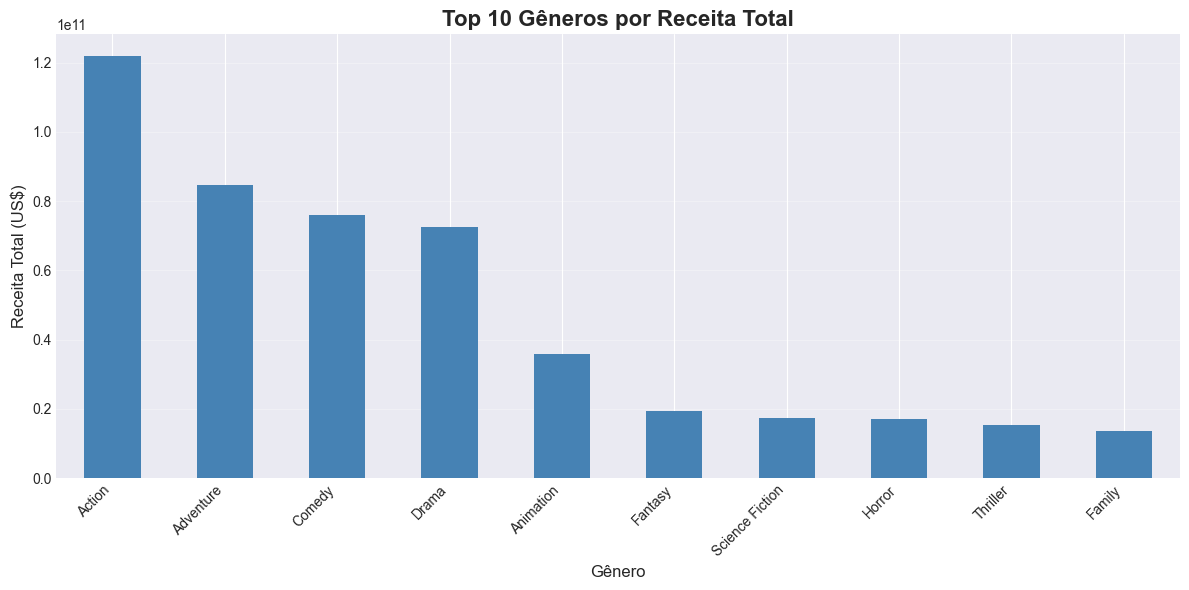


💰 Gênero mais lucrativo: Action
💰 Receita total: $122,047,614,831


In [ ]:
df_analise = dados_integrados[dados_integrados['revenue'] > 0].copy()

receita_por_genero = df_analise.groupby('genero_principal')['revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
receita_por_genero.plot(kind='bar', color='steelblue')
plt.title('Top 10 Gêneros por Receita Total', fontsize=16, fontweight='bold')
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Receita Total (US$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

print(f"\nGênero mais lucrativo: {receita_por_genero.index[0]}")
print(f"Receita total: ${receita_por_genero.values[0]:,.0f}")


### 5.2 Evolucao da Producao Cinematografica ao Longo do Tempo


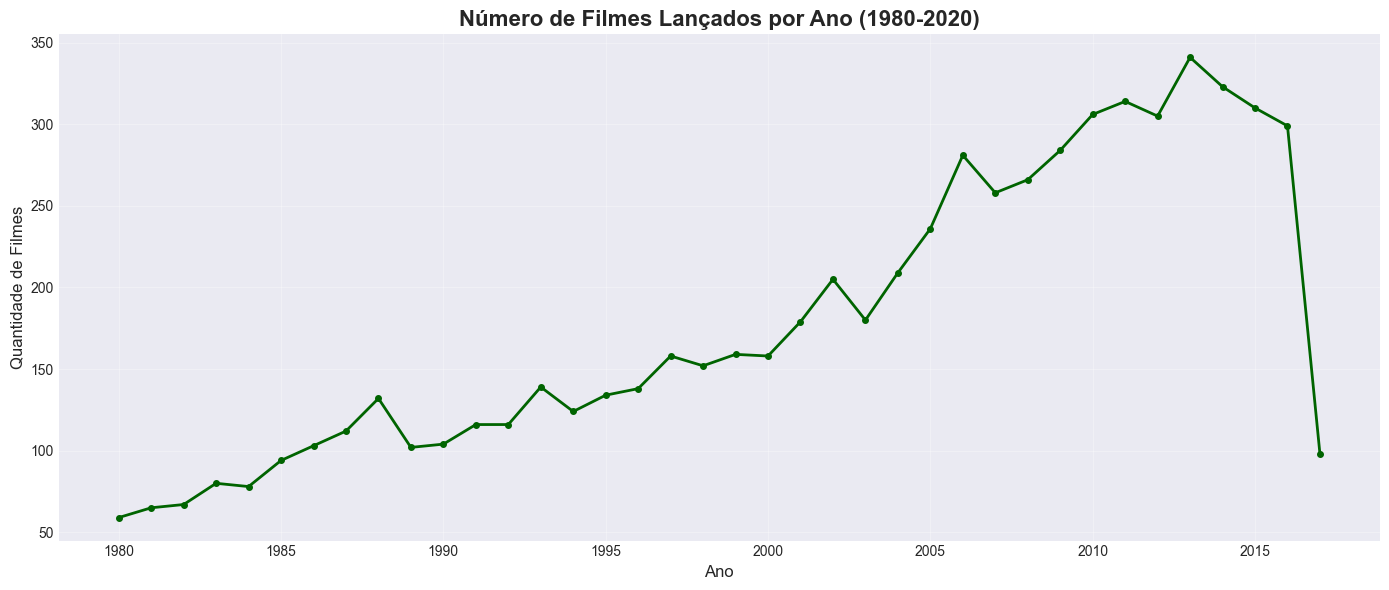


🎬 Ano com mais lançamentos: 2013.0 (341 filmes)


In [ ]:
df_temporal = df_analise[df_analise['ano_lancamento'].notna()].copy()
df_temporal = df_temporal[(df_temporal['ano_lancamento'] >= 1980) & (df_temporal['ano_lancamento'] <= 2020)]

filmes_por_ano = df_temporal.groupby('ano_lancamento').size()

plt.figure(figsize=(14, 6))
plt.plot(filmes_por_ano.index, filmes_por_ano.values, marker='o', linewidth=2, markersize=4, color='darkgreen')
plt.title('Número de Filmes Lançados por Ano (1980-2020)', fontsize=16, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade de Filmes', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nAno com mais lançamentos: {filmes_por_ano.idxmax()} ({filmes_por_ano.max()} filmes)")


### 5.3 Relacao entre Orcamento e Receita (ROI)


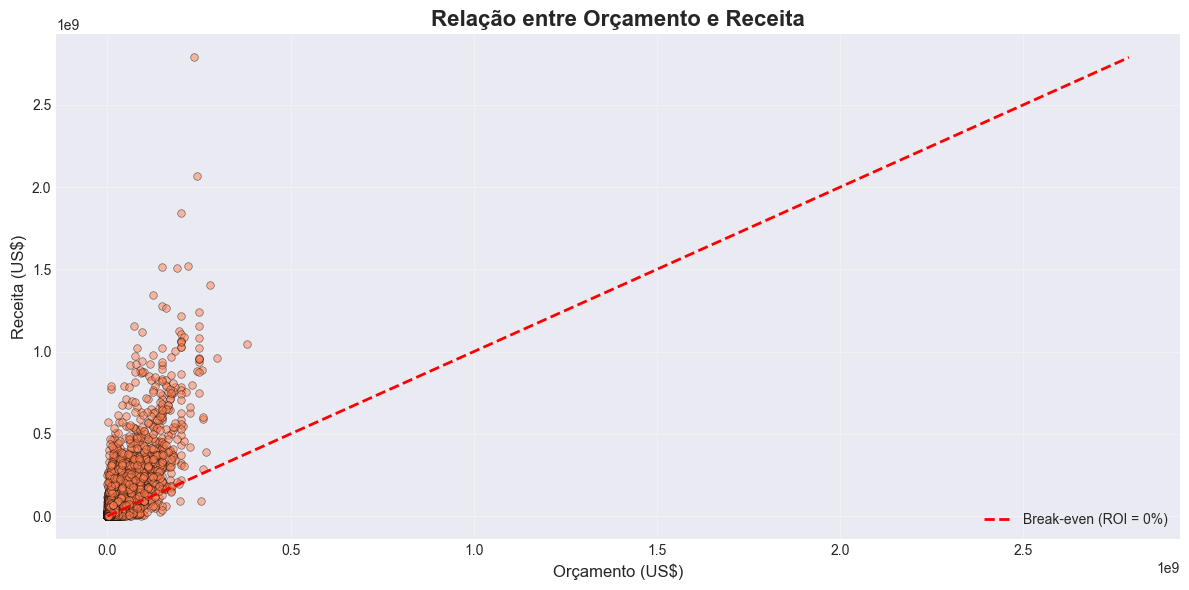


🏆 Top 10 Filmes com Maior ROI:
                  title  budget     revenue          roi genero_principal
         Less Than Zero     1.0  12396383.0 1.239638e+09            Drama
           Modern Times     1.0   8500000.0 8.499999e+08            Drama
  Welcome to Dongmakgol     8.0  33579813.0 4.197476e+08              War
         Aquí Entre Nos     1.0   2755584.0 2.755583e+08           Comedy
The Karate Kid, Part II   113.0 115103979.0 1.018618e+08        Adventure
              Nurse 3-D    10.0  10000000.0 9.999990e+07           Horror
     From Prada to Nada    93.0   2500000.0 2.688072e+06           Comedy
    Paranormal Activity 15000.0 193355800.0 1.288939e+06           Horror
              Tarnation   218.0   1162014.0 5.329339e+05      Documentary
The Blair Witch Project 60000.0 248000000.0 4.132333e+05           Horror


In [ ]:
df_roi = df_analise[(df_analise['budget'] > 0) & (df_analise['revenue'] > 0)].copy()

plt.figure(figsize=(12, 6))
plt.scatter(df_roi['budget'], df_roi['revenue'], alpha=0.5, s=30, c='coral', edgecolors='black', linewidth=0.5)
plt.title('Relação entre Orçamento e Receita', fontsize=16, fontweight='bold')
plt.xlabel('Orçamento (US$)', fontsize=12)
plt.ylabel('Receita (US$)', fontsize=12)
plt.grid(True, alpha=0.3)

max_value = max(df_roi['budget'].max(), df_roi['revenue'].max())
plt.plot([0, max_value], [0, max_value], 'r--', linewidth=2, label='Break-even (ROI = 0%)')
plt.legend()
plt.tight_layout()
plt.show()

top_roi = df_roi.nlargest(10, 'roi')[['title', 'budget', 'revenue', 'roi', 'genero_principal']]
print("\nTop 10 Filmes com Maior ROI:")
print(top_roi.to_string(index=False))


### 5.4 Distribuicao de Filmes por Categoria de Orcamento


### 5.5 Análise de Popularidade vs Receita


In [ ]:
# Análise de Popularidade vs Receita
df_pop = df_analise[df_analise['popularity'].notna()].copy()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
axes[0].scatter(df_pop['popularity'], df_pop['revenue'], alpha=0.4, s=20, c='purple', edgecolors='black', linewidth=0.3)
axes[0].set_title('Relação entre Popularidade e Receita', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Popularidade', fontsize=11)
axes[0].set_ylabel('Receita (US$)', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Top filmes mais populares
top_popular = df_pop.nlargest(10, 'popularity')[['title', 'popularity', 'revenue', 'vote_average']]
y_pos = range(len(top_popular))
axes[1].barh(y_pos, top_popular['popularity'].values, color='mediumpurple')
axes[1].set_yticks(y_pos)
axes[1].set_yticklabels(top_popular['title'].values, fontsize=9)
axes[1].set_title('Top 10 Filmes Mais Populares', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Popularidade', fontsize=11)
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

correlacao_pop_receita = df_pop[['popularity', 'revenue']].corr().iloc[0, 1]
print(f"\n📈 Correlação entre Popularidade e Receita: {correlacao_pop_receita:.3f}")
print(f"✨ Filme mais popular: {top_popular.iloc[0]['title']} (Popularidade: {top_popular.iloc[0]['popularity']:.1f})")


### 5.6 Análise de Avaliação (Rating) por Gênero


In [ ]:
# Análise de Rating por Gênero
df_rating = df_analise[df_analise['vote_average'] > 0].copy()

# Média de rating por gênero (top 10)
rating_por_genero = df_rating.groupby('genero_principal')['vote_average'].agg(['mean', 'count'])
rating_por_genero = rating_por_genero[rating_por_genero['count'] >= 50].sort_values('mean', ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot de rating por categoria de orçamento
df_rating_orcamento = df_analise[(df_analise['vote_average'] > 0) & (df_analise['categoria_orcamento'] != 'Sem informação')].copy()
categorias_ordem = ['Baixo (<1M)', 'Médio (1M-50M)', 'Alto (50M-100M)', 'Muito Alto (>100M)']
df_rating_orcamento = df_rating_orcamento[df_rating_orcamento['categoria_orcamento'].isin(categorias_ordem)]

sns.boxplot(data=df_rating_orcamento, x='categoria_orcamento', y='vote_average', 
            order=categorias_ordem, palette='Set2', ax=axes[0])
axes[0].set_title('Distribuição de Avaliações por Categoria de Orçamento', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Categoria de Orçamento', fontsize=11)
axes[0].set_ylabel('Avaliação Média', fontsize=11)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Top gêneros por rating
axes[1].barh(range(len(rating_por_genero)), rating_por_genero['mean'].values, color='teal')
axes[1].set_yticks(range(len(rating_por_genero)))
axes[1].set_yticklabels(rating_por_genero.index, fontsize=10)
axes[1].set_title('Top 10 Gêneros por Avaliação Média (mín. 50 filmes)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Avaliação Média', fontsize=11)
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n⭐ Gênero com melhor avaliação: {rating_por_genero.index[0]} (Rating: {rating_por_genero.iloc[0]['mean']:.2f}/10)")
print(f"📊 Total de filmes analisados: {len(df_rating):,}")


### 5.7 Matriz de Correlação de Variáveis Numéricas


In [ ]:
# Matriz de Correlação
df_corr = df_analise[['budget', 'revenue', 'popularity', 'vote_average', 'vote_count', 'runtime', 'roi']].copy()
df_corr = df_corr.replace([np.inf, -np.inf], np.nan).dropna()

correlacao = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n🔍 Principais Correlações:")
print(f"   • Budget vs Revenue: {correlacao.loc['budget', 'revenue']:.3f}")
print(f"   • Popularity vs Revenue: {correlacao.loc['popularity', 'revenue']:.3f}")
print(f"   • Vote Count vs Revenue: {correlacao.loc['vote_count', 'revenue']:.3f}")
print(f"   • Vote Average vs Popularity: {correlacao.loc['vote_average', 'popularity']:.3f}")


### 5.8 Análise de Produção por Idioma Original


In [ ]:
# Análise de Idiomas
df_idioma = df_analise[df_analise['original_language'].notna()].copy()

# Top 10 idiomas por quantidade de filmes
idiomas_counts = df_idioma['original_language'].value_counts().head(10)

# Receita média por idioma (top 10)
receita_por_idioma = df_idioma.groupby('original_language')['revenue'].agg(['mean', 'count'])
receita_por_idioma = receita_por_idioma[receita_por_idioma['count'] >= 50].sort_values('mean', ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Quantidade de filmes por idioma
axes[0].barh(range(len(idiomas_counts)), idiomas_counts.values, color='coral')
axes[0].set_yticks(range(len(idiomas_counts)))
axes[0].set_yticklabels(idiomas_counts.index, fontsize=10)
axes[0].set_title('Top 10 Idiomas por Quantidade de Filmes', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Quantidade de Filmes', fontsize=11)
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Receita média por idioma
axes[1].barh(range(len(receita_por_idioma)), receita_por_idioma['mean'].values / 1e6, color='lightseagreen')
axes[1].set_yticks(range(len(receita_por_idioma)))
axes[1].set_yticklabels(receita_por_idioma.index, fontsize=10)
axes[1].set_title('Top 10 Idiomas por Receita Média (mín. 50 filmes)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Receita Média (Milhões de US$)', fontsize=11)
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🌍 Idioma mais comum: {idiomas_counts.index[0]} ({idiomas_counts.values[0]:,} filmes)")
print(f"💰 Idioma mais lucrativo (média): {receita_por_idioma.index[0]} (${receita_por_idioma.iloc[0]['mean']/1e6:.1f}M por filme)")


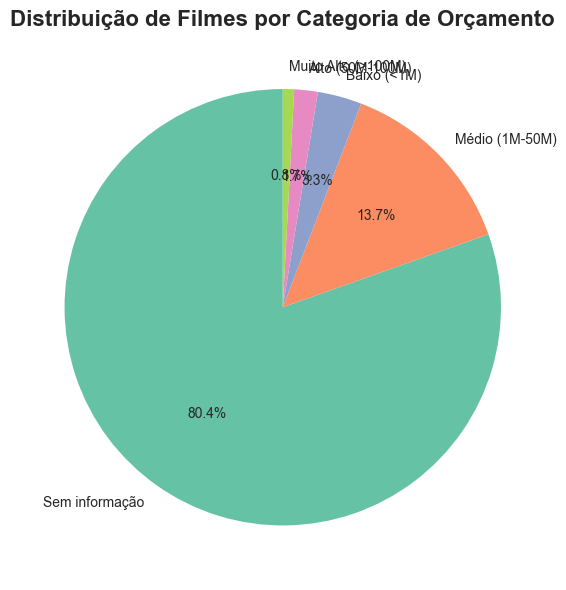


📊 Distribuição de filmes por categoria de orçamento:
  Sem informação: 36624 filmes (80.4%)
  Médio (1M-50M): 6248 filmes (13.7%)
  Baixo (<1M): 1492 filmes (3.3%)
  Alto (50M-100M): 791 filmes (1.7%)
  Muito Alto (>100M): 381 filmes (0.8%)


In [ ]:
categoria_counts = dados_integrados['categoria_orcamento'].value_counts()

plt.figure(figsize=(10, 6))
categoria_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Distribuição de Filmes por Categoria de Orçamento', fontsize=16, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

print("\nDistribuição de filmes por categoria de orçamento:")
for cat, count in categoria_counts.items():
    print(f"  {cat}: {count} filmes ({count/len(dados_integrados)*100:.1f}%)")


## 6. Conclusoes e Insights

### Principais Descobertas:

1. **Generos Lucrativos**: Identificamos os generos cinematograficos mais lucrativos, permitindo que produtoras priorizem investimentos
2. **Tendencias Temporais**: Observamos a evolucao da producao cinematografica ao longo das decadas
3. **ROI**: Analisamos a relacao entre orcamento e receita, identificando filmes com melhor retorno sobre investimento
4. **Distribuicao de Orcamento**: Compreendemos como os filmes estao distribuidos em diferentes faixas de orcamento

### Pipeline Completo Implementado:

✅ **1. Fontes de Dados**: movies_metadata.csv e credits.csv

✅ **2. Ingestao**: Carregamento de dados CSV com Pandas (Batch)

✅ **3. Transformacao**: Limpeza, normalizacao, enriquecimento e integracao

✅ **4. Carregamento**: Salvamento em arquitetura medalhao (Bronze/Silver/Gold) em CSV e Parquet

✅ **5. Destino**: Visualizacoes e insights para tomada de decisao

### Proximos Passos:

- Implementar processamento de streaming (simulacao)
- Adicionar mais fontes de dados (APIs, redes sociais)
- Implementar machine learning para predicao de sucesso de filmes
- Criar dashboard interativo com Plotly/Dash
